In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',index_col='Date',parse_dates=True)

In [13]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [14]:
#缩短数据集的列名
data.columns = ['West','East']#新增一列total
data['Total'] = data.eval('West+East')#total为w+e
data.dropna().describe()

,West,East,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


Text(0,0.5,'Hourly Bicyle Count')

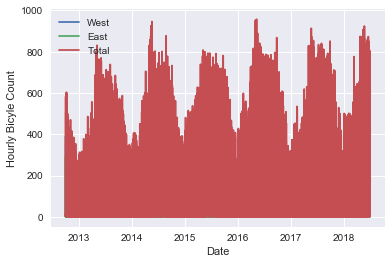

In [15]:
#1.数据可视化
%matplotlib inline
import seaborn;seaborn.set()

data.plot()
plt.ylabel('Hourly Bicyle Count')

Text(0,0.5,'Weekly bicyle count')

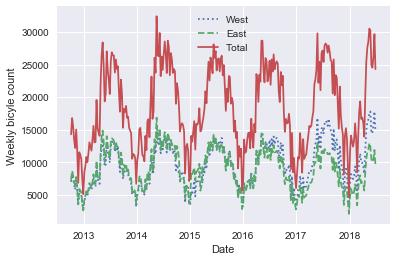

In [16]:
#通过重新取样获取更大颗粒度
#这样可以显示出季度特征
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicyle count')

Text(0.5,1,'mean of 30 days count')

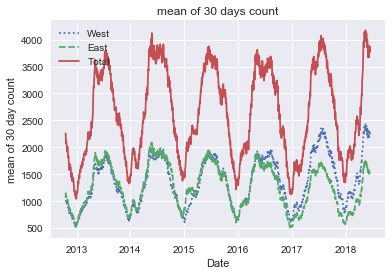

In [17]:
#简单方法，利用rolling求移动平均值
daily = data.resample('D').sum()
daily.rolling(30,center=True).mean().plot(style=[':','--','-'])
plt.ylabel('mean of 30 day count')
plt.title('mean of 30 days count')

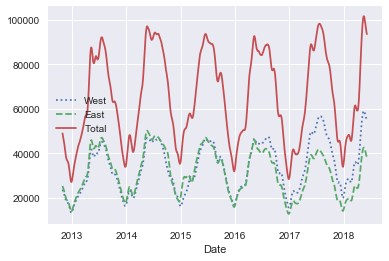

In [18]:
#高斯平滑，设置窗口宽度50，设置窗内高斯平滑10天
daily.rolling(50,center=True,
             win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

Text(0.5,1,'every hour bicycle flow')

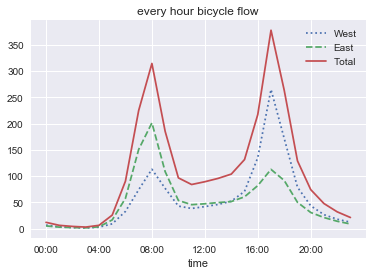

In [19]:
#2.深入挖掘数据
by_time = data.groupby(data.index.time).mean()#根据时间聚合后，再平均
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks,style=[':','--','-'])
plt.title('every hour bicycle flow')

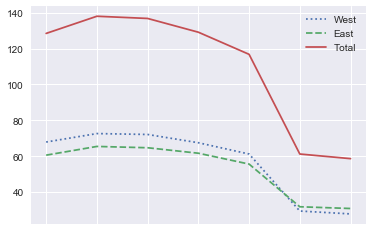

In [21]:
#3.每周每天的自行车流量
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])

In [22]:
#观察一周内工作日与双休日每个小时的数据
weekend = np.where(data.index.weekday < 5,'Weekday','Weekend')
by_time = data.groupby([weekend,data.index.time]).mean()

C:\Users\mj\Anaconda3\envs\ten\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\mj\Anaconda3\envs\ten\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


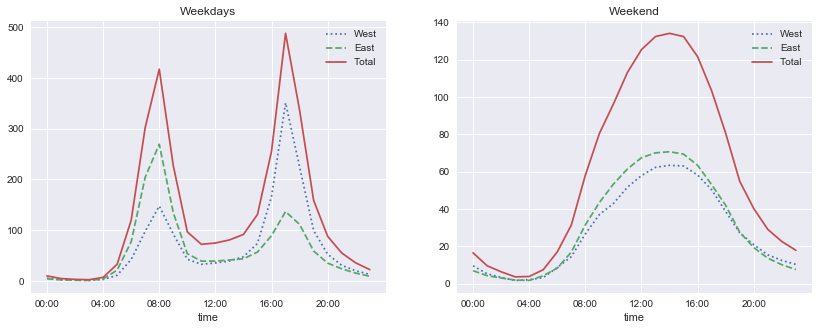

In [27]:
#工作日与双休日每小时的自行车流量
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
by_time.ix['Weekday'].plot(ax = ax[0],title='Weekdays',xticks=hourly_ticks,style=[':','--','-'])
by_time.ix['Weekend'].plot(ax = ax[1],title='Weekend',xticks=hourly_ticks,style=[':','--','-'])

## 性能优化

In [28]:
import pandas as pd
nrows, ncols = 100000,100
rng = np.random.RandomState(42)
df1,df2,df3,df4 = (pd.DataFrame(rng.rand(nrows,ncols))
                  for i in range(4))

In [29]:
#普通方法
%timeit df1+df2+df3+df4

72.7 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
#优化方法
%timeit pd.eval('df1+df2+df3+df4')

36.9 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


性能eval()版本比普通方法快1倍（而且内存消耗更少）

In [31]:
np.allclose(df1+df2+df3+df4,pd.eval('df1+df2+df3+df4'))

True

In [32]:
df.values.nbytes

NameError: name 'df' is not defined